In [1]:
import cv2

In [2]:
img = cv2.imread('1.jpg')

In [3]:
import matplotlib.pyplot as plt

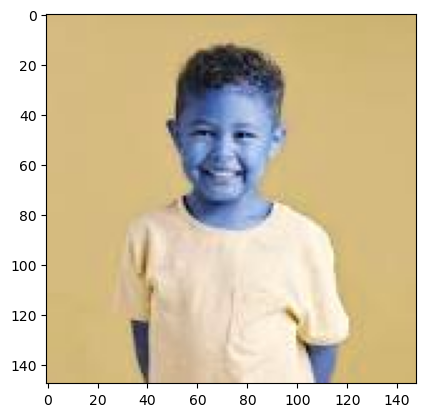

In [4]:
plt.imshow(img)

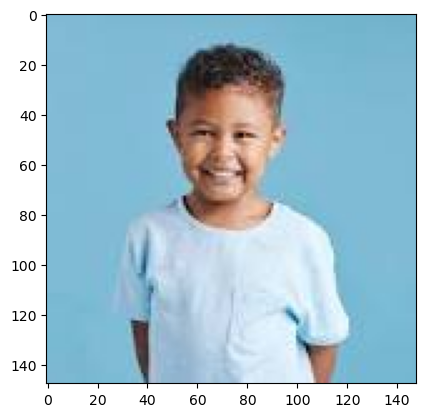

In [5]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [6]:
from deepface import DeepFace
import tensorflow as tf


In [7]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.57s/it]


In [8]:
predictions

[{'emotion': {'angry': 0.0019388147355818318,
   'disgust': 2.5797626557190134e-05,
   'fear': 0.0007685699522535281,
   'happy': 99.98841285843696,
   'sad': 0.0004341040886184682,
   'surprise': 0.00021262996790952896,
   'neutral': 0.008199525223309892},
  'dominant_emotion': 'happy',
  'region': {'x': 48,
   'y': 29,
   'w': 47,
   'h': 47,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.94,
  'age': 21,
  'gender': {'Woman': 34.978944063186646, 'Man': 65.02105593681335},
  'dominant_gender': 'Man',
  'race': {'asian': 43.665531277656555,
   'indian': 13.591980934143066,
   'black': 17.955856025218964,
   'white': 3.5408806055784225,
   'middle eastern': 1.9480492919683456,
   'latino hispanic': 19.297704100608826},
  'dominant_race': 'asian'}]

In [16]:
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f"{new_key}_{i}", sep=sep).items())
                else:
                    items.append((f"{new_key}_{i}", item))
        else:
            items.append((new_key, v))
    return dict(items)

In [10]:
flattened_data = flatten_dict(predictions[0])
print(flattened_data)

{'emotion_angry': 0.0019388147355818318, 'emotion_disgust': 2.5797626557190134e-05, 'emotion_fear': 0.0007685699522535281, 'emotion_happy': 99.98841285843696, 'emotion_sad': 0.0004341040886184682, 'emotion_surprise': 0.00021262996790952896, 'emotion_neutral': 0.008199525223309892, 'dominant_emotion': 'happy', 'region_x': 48, 'region_y': 29, 'region_w': 47, 'region_h': 47, 'region_left_eye': None, 'region_right_eye': None, 'face_confidence': 0.94, 'age': 21, 'gender_Woman': 34.978944063186646, 'gender_Man': 65.02105593681335, 'dominant_gender': 'Man', 'race_asian': 43.665531277656555, 'race_indian': 13.591980934143066, 'race_black': 17.955856025218964, 'race_white': 3.5408806055784225, 'race_middle eastern': 1.9480492919683456, 'race_latino hispanic': 19.297704100608826, 'dominant_race': 'asian'}


In [11]:
type(flattened_data)

dict

In [12]:
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1  # Adjust font scale as needed
color = (0, 255, 0)  # Green color in BGR format
thickness = 2  # Thickness of the text stroke
line_type = cv2.LINE_AA  # Anti-aliased line

# Text position (bottom-left corner of the text string)
position = (50, 50)  # (x, y) coordinates

# Add text to the image
cv2.putText(img, flattened_data['dominant_emotion'], position, font, font_scale, color, thickness, line_type)

# Save or display the image
cv2.imwrite('output_image.jpg', img)

True

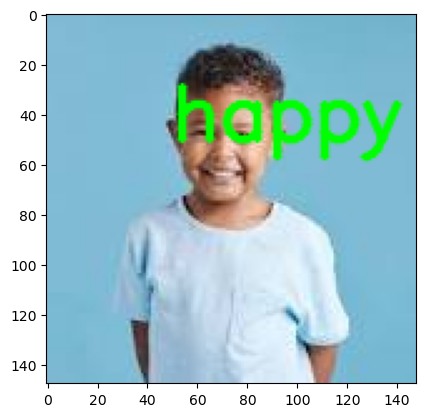

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [1]:
import cv2
from deepface import DeepFace

# Open the default camera
camera = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not camera.isOpened():
    print("Error: Could not open camera.")
else:
    while True:
        # Capture frame-by-frame
        ret, frame = camera.read()

        # If frame was read correctly, ret is True
        if not ret:
            print("Error: Failed to capture image.")
            break
        
        # Try to analyze the frame using DeepFace
        try:
            analysis = DeepFace.analyze(frame, actions=['age', 'gender', 'emotion'], enforce_detection=False)
            
            # If the analysis returns a list, take the first detected face
            if isinstance(analysis, list):
                analysis = analysis[0]

            # Extract results
            age = analysis['age']
            emotion = analysis['dominant_emotion']
            
            # Display analysis results on the frame
            cv2.putText(frame, f'Age: {age}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(frame, f'Emotion: {emotion}', (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        except Exception as e:
            print(f"Error analyzing frame: {e}")

        # Display the resulting frame with analysis
        cv2.imshow('Camera Feed with DeepFace Analysis', frame)

        # Exit if the user presses 'q' or if the window is closed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        # Check if the window is manually closed
        if cv2.getWindowProperty('Camera Feed with DeepFace Analysis', cv2.WND_PROP_VISIBLE) < 1:
            break

# Release the camera and close all OpenCV windows
camera.release()
cv2.destroyAllWindows()




Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.20it/s]
